# 👉 What is PyCaret?

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows. It is an end-to-end machine learning and model management tool that speeds up the experiment cycle exponentially and makes you more productive.

In comparison with the other open-source machine learning libraries, PyCaret is an alternate low-code library that can be used to replace hundreds of lines of code with few words only. This makes experiments exponentially fast and efficient. PyCaret is essentially a Python wrapper around several machine learning libraries and frameworks such as scikit-learn, XGBoost, LightGBM, CatBoost, spaCy, Optuna, Hyperopt, Ray, and many more.

The design and simplicity of PyCaret is inspired by the emerging role of citizen data scientists, a term first used by Gartner. Citizen Data Scientists are power users who can perform both simple and moderately sophisticated analytical tasks that would previously have required more expertise. Seasoned data scientists are often difficult to find and expensive to hire but citizen data scientists can be an effective way to mitigate this gap and address data-related challenges in the business setting.

Official Website: https://www.pycaret.org
Documentation: https://pycaret.readthedocs.io/en/latest/

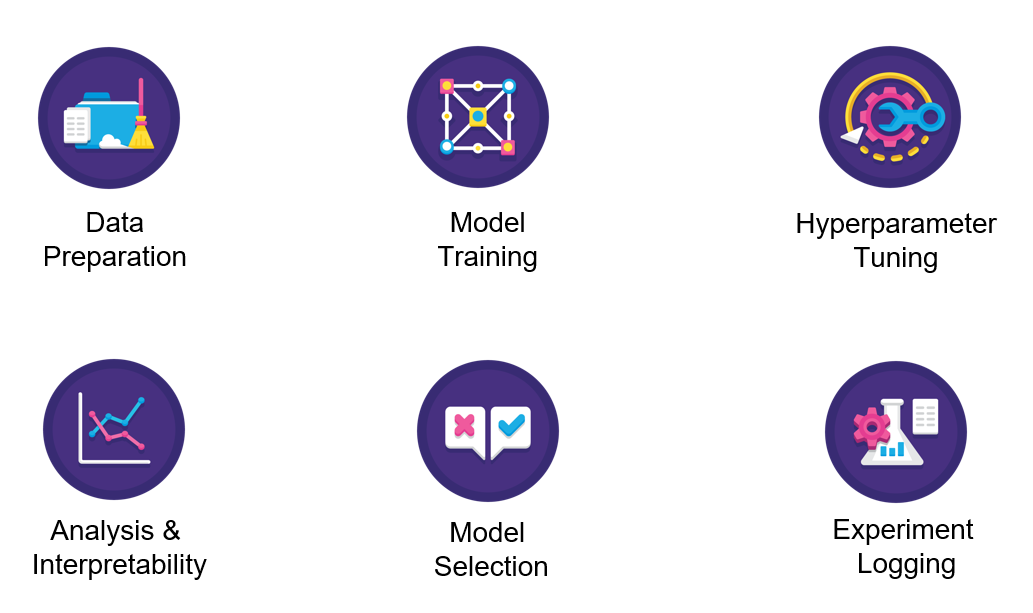

# 👉 Install PyCaret
Installing PyCaret is very easy and takes only a few minutes. We strongly recommend using a virtual environment to avoid potential conflicts with other libraries. PyCaret's default installation is a slim version of pycaret that only installs hard dependencies that are listed in [requirements.txt](https://github.com/pycaret/pycaret/blob/master/requirements.txt). To install the default version:

- `pip install pycaret`

When you install the full version of pycaret, all the optional dependencies as listed [here](https://github.com/pycaret/pycaret/blob/master/requirements-optional.txt) are also installed.To install version:

- `pip install pycaret[full]`

# 👉Dataset

In [1]:
from pycaret.datasets import get_data
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 👉 Data Preparation

In [2]:
from pycaret.regression import *
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


In [3]:
# check transformed X_train
get_config('X_train')

,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
300,36.0,27.549999,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
904,60.0,35.099998,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
670,30.0,31.570000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
617,49.0,25.600000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
373,26.0,32.900002,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,37.0,22.705000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1147,20.0,31.920000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
106,19.0,28.400000,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1041,18.0,23.084999,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [4]:
# list columns of transformed X_train 
get_config('X_train').columns

Index(['age', 'bmi', 'sex_female', 'children_0', 'children_1', 'children_2',
       'children_3', 'children_4', 'children_5', 'smoker_yes',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest'],
      dtype='object')

# 👉Model Training & Selection

## Compare Models

In [5]:
# train all models using default hyperparameters
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2702.7680,23242056.4409,4801.5704,0.8348,0.4397,0.3113,0.0480
catboost,CatBoost Regressor,2844.4446,24943135.5224,4977.1926,0.8228,0.4707,0.3364,2.0210
rf,Random Forest Regressor,2736.7455,24862762.2305,4970.6959,0.8213,0.4674,0.3294,0.2620
lightgbm,Light Gradient Boosting Machine,2959.5584,25236477.0456,5013.0892,0.8171,0.5427,0.3685,0.1770
ada,AdaBoost Regressor,4162.2323,28328260.0955,5316.6146,0.7985,0.6349,0.7263,0.0180
et,Extra Trees Regressor,2814.2964,28815493.0260,5339.0879,0.7964,0.4889,0.3350,0.2560
xgboost,Extreme Gradient Boosting,3302.3215,31739266.6000,5615.5941,0.7701,0.5661,0.4218,0.7540
llar,Lasso Least Angle Regression,4315.7895,38355976.5126,6173.8740,0.7311,0.6105,0.4415,0.0150
ridge,Ridge Regression,4336.2309,38381496.8000,6175.9541,0.7309,0.6193,0.4454,0.0160
br,Bayesian Ridge,4333.6881,38381669.3629,6175.9476,0.7308,0.6151,0.4450,0.0140


In [6]:
print(best)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [7]:
type(best)

sklearn.ensemble._gb.GradientBoostingRegressor

## Create Model

In [8]:
# train individual model
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3001.2294,37001480.2590,6082.8842,0.7790,0.4984,0.3140
1,3389.8885,49305179.5732,7021.7647,0.7133,0.5574,0.3361
2,2926.0191,42025684.6666,6482.7220,0.4679,0.6215,0.4025
3,2744.7144,34078761.4507,5837.7017,0.7154,0.5412,0.3740
4,3924.4816,59489464.3207,7712.9414,0.5575,0.6455,0.4796
5,3322.5435,42747575.4453,6538.1630,0.7250,0.4869,0.2928
6,3158.7047,49369669.1652,7026.3553,0.6641,0.4511,0.3089
7,2405.2970,31318616.6440,5596.3038,0.8278,0.4497,0.1434
8,3021.5461,39091793.3775,6252.3430,0.7475,0.5117,0.4381
9,3588.9772,53231891.5889,7296.0189,0.6571,0.5679,0.3653


In [9]:
print(dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=123, splitter='best')


## Tune Hyperparameters

In [12]:
# tune hyperparameters of model
tuned_dt = tune_model(dt, search_library = 'optuna')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2701.1273,21028661.9672,4585.7019,0.8744,0.4025,0.2937
1,3091.8449,30933374.9177,5561.7780,0.8201,0.4644,0.3233
2,2617.2545,22345453.1888,4727.0978,0.7171,0.4627,0.3155
3,2830.8796,22588574.3822,4752.7439,0.8114,0.4632,0.3918
4,2960.2007,25929500.5455,5092.1018,0.8071,0.4537,0.3175
5,2653.9498,18985846.9396,4357.2752,0.8779,0.3584,0.2672
6,2556.3558,18410040.3286,4290.6923,0.8747,0.3800,0.3059
7,2614.9736,22942326.3754,4789.8149,0.8738,0.4678,0.3049
8,2671.8309,19576326.3629,4424.5143,0.8736,0.3970,0.3326
9,2602.0013,23910249.5350,4889.8108,0.8460,0.4363,0.2869


In [13]:
print(tuned_dt)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='friedman_mse', max_depth=5,
                      max_features=0.9723036176467299, max_leaf_nodes=None,
                      min_impurity_decrease=7.642419608769017e-06,
                      min_impurity_split=None, min_samples_leaf=6,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      presort='deprecated', random_state=123, splitter='best')


## Ensemble Model

In [14]:
bagged_tunned_dt = ensemble_model(tuned_dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2584.1702,20381846.7339,4514.6259,0.8783,0.4112,0.3067
1,2957.1900,30309405.6671,5505.3979,0.8238,0.4556,0.2961
2,2481.1893,19964450.5458,4468.1596,0.7472,0.4411,0.2926
3,2715.0783,20812332.5053,4562.0535,0.8262,0.4392,0.3649
4,2763.6315,25039494.3653,5003.9479,0.8138,0.4619,0.2862
5,2537.7935,18224009.0741,4268.9588,0.8828,0.3294,0.2451
6,2319.5499,16909113.0122,4112.0692,0.8849,0.3442,0.2728
7,2451.7525,22210287.0372,4712.7791,0.8779,0.4352,0.2625
8,2452.7959,19002500.6278,4359.1858,0.8773,0.4294,0.3517
9,2490.9265,23750364.4102,4873.4346,0.8470,0.4422,0.2904


In [15]:
print(bagged_tunned_dt)

BaggingRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                      criterion='friedman_mse',
                                                      max_depth=5,
                                                      max_features=0.9723036176467299,
                                                      max_leaf_nodes=None,
                                                      min_impurity_decrease=7.642419608769017e-06,
                                                      min_impurity_split=None,
                                                      min_samples_leaf=6,
                                                      min_samples_split=6,
                                                      min_weight_fraction_leaf=0.0,
                                                      presort='deprecated',
                                                      random_state=123,
                                                      splitter=

## Voting Ensemble

In [16]:
dt = create_model('dt', verbose=False)
lasso = create_model('lasso', verbose=False)
knn = create_model('knn', verbose=False)
blender = blend_models([dt,lasso,knn])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4317.6330,40225874.7120,6342.3871,0.7597,0.5377,0.5095
1,4603.8770,47671358.8264,6904.4449,0.7228,0.5528,0.4544
2,3526.5657,30025112.7222,5479.5176,0.6198,0.6098,0.5355
3,4059.9577,33028436.9777,5747.0372,0.7242,0.6159,0.6499
4,4719.1236,47134827.5838,6865.4809,0.6494,0.5783,0.5456
5,4036.9877,39416780.6753,6278.2785,0.7464,0.4745,0.3684
6,4098.2195,43644758.3056,6606.4180,0.7030,0.5116,0.4656
7,3938.6892,37270337.0487,6104.9437,0.7951,0.4289,0.3185
8,4493.1798,43777521.8925,6616.4584,0.7172,0.5800,0.6167
9,4452.8107,44338906.9474,6658.7466,0.7144,0.5613,0.4606


In [17]:
print(blender)

VotingRegressor(estimators=[('dt',
                             DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=123,
                                                   splitter='best')),
                            ('la

In [18]:
type(blender)

sklearn.ensemble._voting.VotingRegressor

## Stacking Ensemble

In [19]:
stacker = stack_models([dt,lasso,knn])

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3330.1372,26118092.6166,5110.5863,0.8440,0.4528,0.3698
1,3823.1056,36671240.6179,6055.6784,0.7868,0.5307,0.3557
2,3330.5109,29504475.5264,5431.8022,0.6264,0.5701,0.3860
3,3029.4249,21804106.6611,4669.4868,0.8179,0.4804,0.4295
4,3931.7435,36775712.8059,6064.2982,0.7265,0.5132,0.3751
5,3461.5432,29482846.8211,5429.8109,0.8103,0.4937,0.3541
6,3479.7848,31955531.2624,5652.9224,0.7826,0.4684,0.3600
7,3610.5786,30708816.3945,5541.5536,0.8311,0.5030,0.2904
8,3761.7961,27523649.5059,5246.2986,0.8222,0.5596,0.4627
9,3913.4878,35744866.0161,5978.7010,0.7698,0.6368,0.4228


In [20]:
print(stacker)

StackingRegressor(cv=KFold(n_splits=10, random_state=RandomState(MT19937) at 0x1B967A57468,
   shuffle=False),
                  estimators=[('dt',
                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presor...
                                     positive=Fa

# Analyze Model

In [21]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

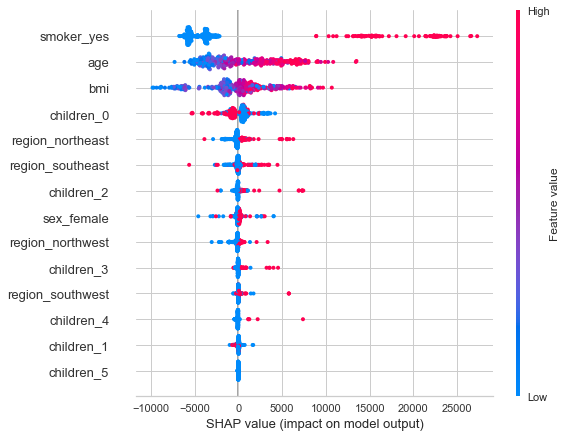

In [22]:
interpret_model(dt)

In [23]:
interpret_model(dt, plot = 'reason', observation=1)

# Model Predictions

In [24]:
# predict on holdout / test set
pred_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2386.2018,17296249.1379,4158.8759,0.8789,0.3985,0.2922


In [25]:
pred_holdout.head()

,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,49.0,42.680000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9800.888672,10621.483595
1,32.0,37.334999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4667.607422,7290.151941
2,27.0,31.400000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,34838.871094,36012.959871
3,35.0,24.129999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5125.215820,7553.788882
4,60.0,25.740000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12142.578125,14904.032497


In [26]:
# predict on new data
data2 = data.copy()
data2.drop('charges', axis=1, inplace=True)
data2.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [27]:
# finalize model
best_final = finalize_model(best)

In [28]:
# predict on data2
predictions = predict_model(best_final, data=data2)
predictions.head()

,age,sex,bmi,children,smoker,region,Label
0,19,female,27.900,0,yes,southwest,18894.260073
1,18,male,33.770,1,no,southeast,3698.287534
2,28,male,33.000,3,no,southeast,6029.271578
3,33,male,22.705,0,no,northwest,8958.189116
4,32,male,28.880,0,no,northwest,3900.039002


# 👉 Save / Load / Deploy Model

In [29]:
save_model(best_final, 'insurance-pipeline')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                            learning_rate=0.1, loss='ls',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                           

In [30]:
loaded_pipeline = load_model('insurance-pipeline')

Transformation Pipeline and Model Successfully Loaded


In [31]:
print(loaded_pipeline)

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='charges',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strategy...
                                           learning_rate=0.1, loss='ls',
                                           max_depth=3, max_features=None,
                                           max_leaf_nodes=None,
                                           min_impurity_decrease=0.0,
                                           

In [32]:
# deploy model on AWS S3
deploy_model(best_final, 'insurance-pipeline-aws', platform = 'aws',
             authentication = {'bucket' : 'pycaret-test'})

Model Succesfully Deployed on AWS S3


## THE END